Here we are going to take a deeper look at the game review/sales data, see if there are any visible trends in the data. First off, I want to remember what columns I'm dealing with and make sure that I load in the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sales = pd.read_csv("cleaned_game.csv")
print(sales.columns)

Index(['Unnamed: 0', 'index', 'Name', 'Platform', 'Year_of_Release', 'Genre',
       'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating', 'IGN'],
      dtype='object')


Okay, so we're good to go. Now we are interested in seeing if we can understand something about the sales based on the reviews, but there are other things we might want to look at too. For example, you can see that the columns 'Critic_Count' and 'User_Count' suggest that there is a variability in how many people have rated these games. If a game has only a few reviewers, it might influence the rating too strongly. We'll look at that later.

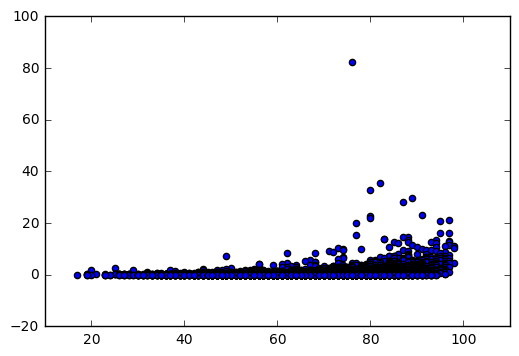

In [2]:
plt.scatter(sales['Critic_Score'], sales['Global_Sales'])
plt.show()

        So as we can see, that visualization isn't exactly telling us everything. That's because most of the games sales are less than 1 million. So what that tells us is that the games that don't sell a ton might distort how sales are. But let's try to limit the ranges so that we can see the distribution a little more clearly.

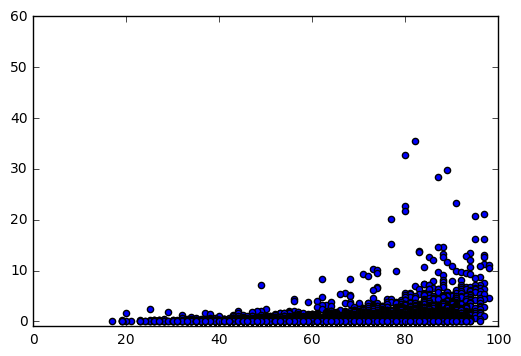

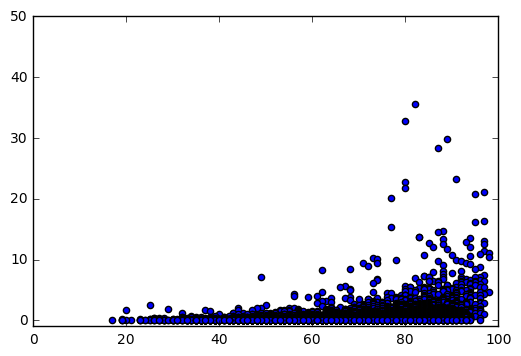

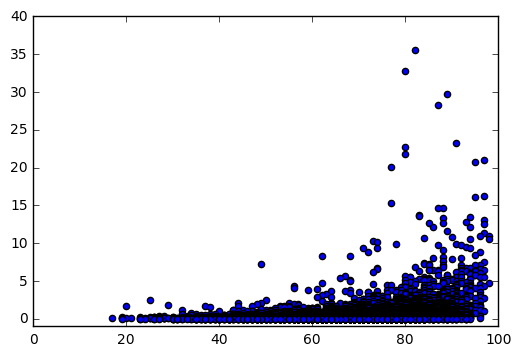

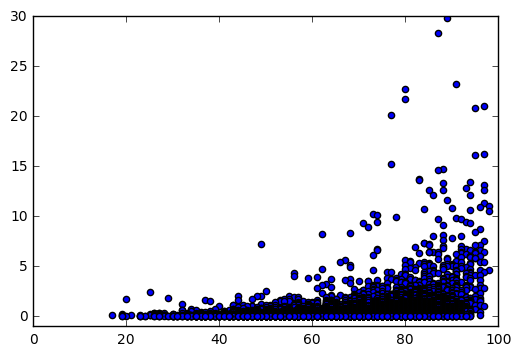

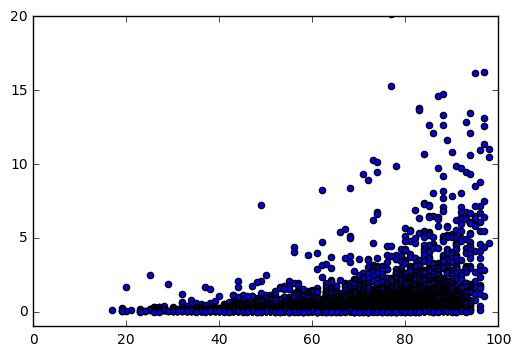

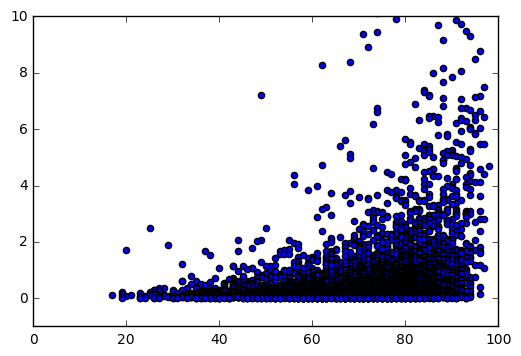

In [34]:
for i in range(1,7):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(0, 100)
    ax.set_ylim(-1, 70 - i*10)
    plt.scatter(sales['Critic_Score'], sales['Global_Sales'])
    plt.show()

When trying to visualize user scores, we found that some of the columns lack numbers. It looks like we missed them while cleaning the data. So it is time to do a little more cleaning. This is a tough one because for some reason Pandas isn't recognizing any number in the user_score as a number. And the method, df.applymap(...), didn't give we the right results.

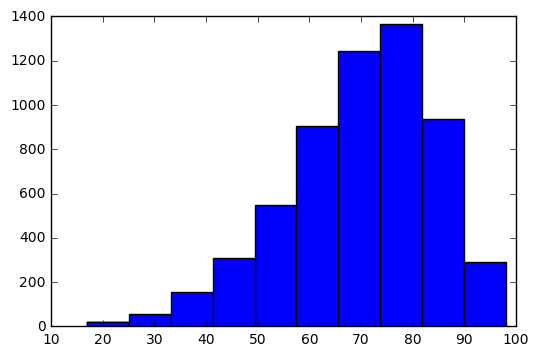

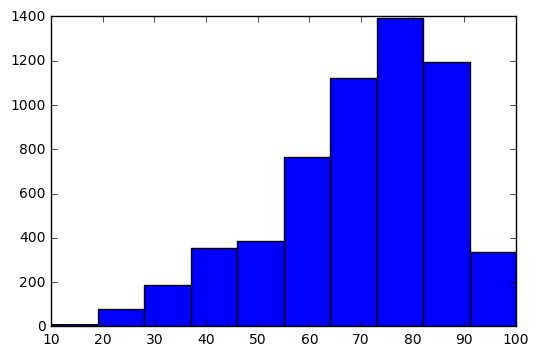

In [25]:
plt.hist(sales['Critic_Score'], bins=10)
plt.show()
#plt.hist(sales_scores['User_Score'],bins=10)
#plt.show()
plt.hist(sales['IGN']*10,bins=10)
plt.show()

So it's interesting to see that a lot of the review score distributions look almost identical between the two groups. That gives us a clue that there isn't a bias difference between the two groups. But of course, IGN scores are often factored into the metacritic score, though it could be one of fifty or so scores from reviewers.